Obliczyć wymiar fraktalny Df kolejnych obiektów wykonując
dopasowanie prostej

log Nr = Df log(2)r + const.

Należy oszacować błędy dopasowania oraz ustalić rozsądny
zakres, w którym zależność jest liniowa w skali log-log.
Przedstawić dopasowania na wykresach.
Do testowania metody użyć trójkąta Sierpińskiego
posiadającego znany wymiar Df ≈1.585.

[1 2 3 4 5 6 7 8 9]
D = 1.5818231092755106
[[ 0.52777777 -0.12022458]
 [-0.12022458  0.03468948]]


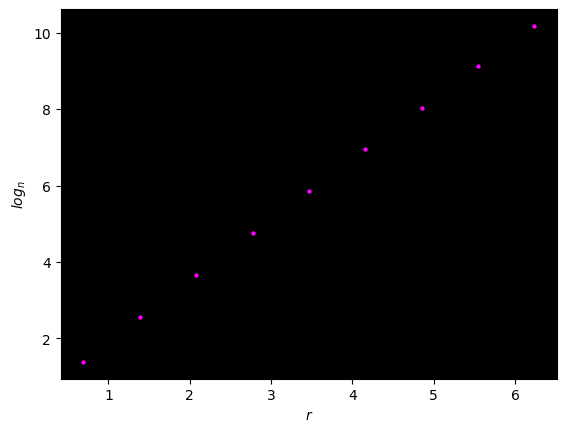

[1 2 3 4 5 6 7 8 9]
[ 1.38629436  2.56494936  3.66356165  4.75359019  5.84643878  6.94312242
  8.03495502  9.13118893 10.17507835]


In [11]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy import optimize
import os

os.makedirs('images', exist_ok=True)

'''
p = 1./3, m = [0.5, 0, 0, 0.5, 0.25, sqrt(3.)/4]
p = 1./3, m = [0.5, 0, 0, 0.5, 0.0, 0]
p = 1./3, m = [0.5, 0, 0, 0.5, 0.5, 0]
'''

sierpinski = [[0.5, 0, 0, 0.5, 0.25, np.sqrt(3.)/4], [0.5, 0, 0, 0.5, 0.0, 0], [0.5, 0, 0, 0.5, 0.5, 0]]
probability_s = [1./3, 1./3, 1./3]

barnsley = [[0.001, 0.0, 0.0, 0.16, 0.0, 0.0], [-0.15, 0.28, 0.26, 0.24, 0.0, 0.44], [ 0.2,-0.26, 0.23, 0.22, 0.0, 1.6], [ 0.85, 0.04,-0.04, 0.85, 0.0, 1.6]]
probability_b = [0.02, 0.09, 0.10, 0.79]

def ifs(x, y, transform):
    return (transform[0]*x + transform[1]*y + transform[4], transform[2]*x + transform[3]*y + transform[5])

x = [0]
y = [0]

for a in range(100000):
    k = random.choice([0, 1, 2], p = probability_s)
    (x_0, y_0) = ifs(x[-1], y[-1], sierpinski[k])
    x.append(x_0)
    y.append(y_0)

rs = np.arange(10)[1:]
N = []

print(rs)
for r in rs:
    histogram = np.histogram2d(x, y, bins=2**r)
    notEmptyNumber = np.count_nonzero(histogram[0])
    N.append(notEmptyNumber)


log_n = np.log(N)
log_r = np.log(2**rs)

fitfunc = lambda p, x, y: y - (p[0] + p[1] * x)

pinit = [1.,2.]
out = optimize.leastsq(fitfunc, pinit,
                       args=(log_r, log_n), full_output=1)

pfinal = out[0]
covar = out[1]
print(f"D = {pfinal[1]}")
print(covar)


plt.rcParams['axes.facecolor'] = 'black'
plt.scatter(log_r, log_n, s=10, c='magenta', lw=0, marker='o')
plt.xlabel("$r$")
plt.ylabel("$log_n$")
plt.savefig("images/log_n.png")
plt.show()


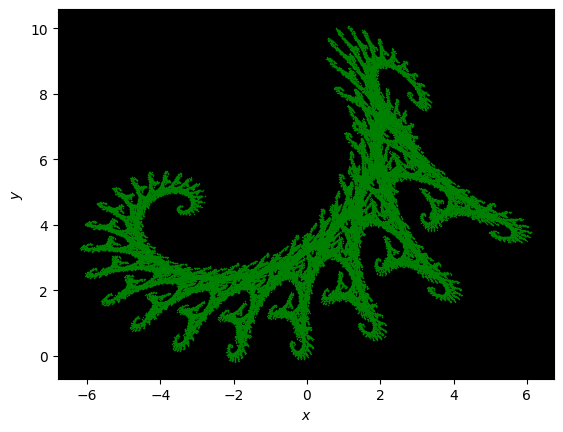

[1 2 3 4 5 6 7 8 9]
D = 1.6526520847847965
[[ 0.52777784 -0.1202246 ]
 [-0.1202246   0.03468949]]


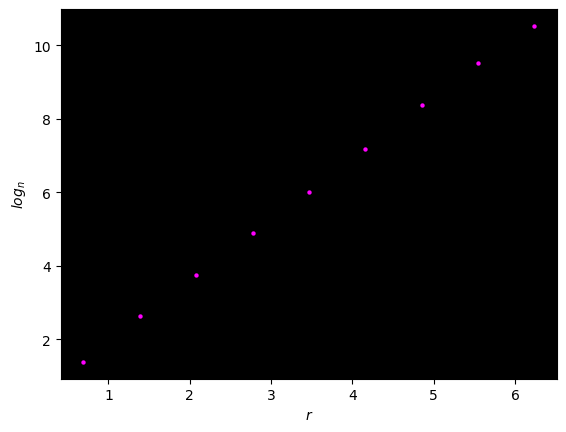

In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy import optimize
import os

os.makedirs('images', exist_ok=True)

'''
p = 1./3, m = [0.5, 0, 0, 0.5, 0.25, sqrt(3.)/4]
p = 1./3, m = [0.5, 0, 0, 0.5, 0.0, 0]
p = 1./3, m = [0.5, 0, 0, 0.5, 0.5, 0]
'''

dragon = [ [0.824074, 0.281482, -0.212346, 0.864198, -1.882290, -0.110607],
           [0.088272, 0.520988, -0.463889, -0.377778,0.785360, 8.095795]]
probability_d = [0.787473, 0.212527]

def ifs(x, y, transform):
    return (transform[0]*x + transform[1]*y + transform[4], transform[2]*x + transform[3]*y + transform[5])

x = [0]
y = [0]

for a in range(100000):
    k = random.choice([0, 1], p = probability_d)
    (x_0, y_0) = ifs(x[-1], y[-1], dragon[k])
    x.append(x_0)
    y.append(y_0)

plt.rcParams['axes.facecolor'] = 'black'
plt.scatter(x, y, s=1, c='green', lw=0, marker='o')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig("images/barnsley.png")
plt.show()

rs = np.arange(10)[1:]
N = []


print(rs)
for r in rs:
    histogram = np.histogram2d(x, y, bins=2**r)
    notEmptyNumber = np.count_nonzero(histogram[0])
    N.append(notEmptyNumber)


log_n = np.log(N)
log_r = np.log(2**rs)

fitfunc = lambda p, x, y: y - (p[0] + p[1] * x)

pinit = [1.,2.]
out = optimize.leastsq(fitfunc, pinit,
                       args=(log_r, log_n), full_output=1)

pfinal = out[0]
covar = out[1]
print(f"D = {pfinal[1]}")
print(covar)


plt.rcParams['axes.facecolor'] = 'black'
plt.scatter(log_r, log_n, s=10, c='magenta', lw=0, marker='o')
plt.xlabel("$r$")
plt.ylabel("$log_n$")
plt.savefig("images/log_n.png")
plt.show()




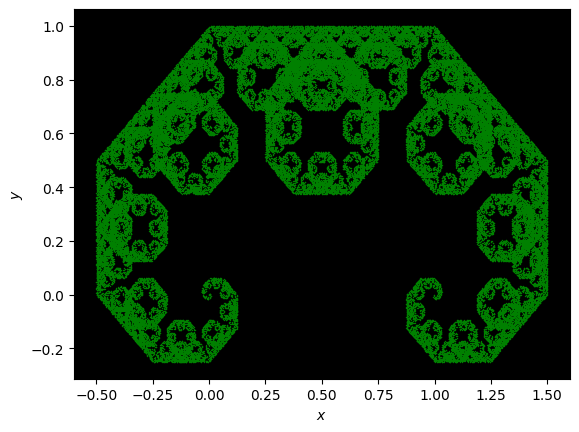

[1 2 3 4 5 6 7]
D = 1.787679110702541
[[ 0.71428576 -0.2060993 ]
 [-0.2060993   0.07433461]]


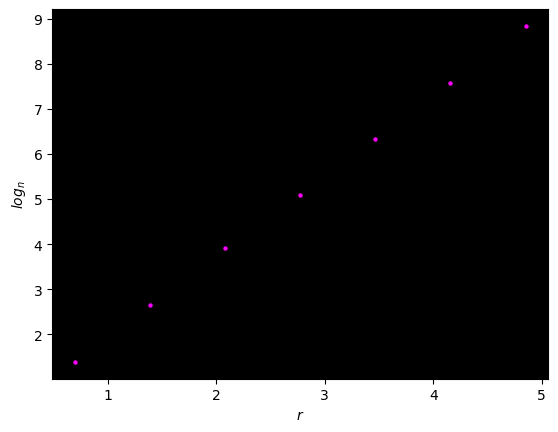

In [3]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy import optimize
import os

os.makedirs('images', exist_ok=True)

'''
p = 1./3, m = [0.5, 0, 0, 0.5, 0.25, sqrt(3.)/4]
p = 1./3, m = [0.5, 0, 0, 0.5, 0.0, 0]
p = 1./3, m = [0.5, 0, 0, 0.5, 0.5, 0]
'''

c_levy = [ [0.5, -0.5, 0.5, 0.5, 0.0, 0.0],
           [0.5, 0.5, -0.5, 0.5, 0.5, 0.5]]
probability_l = [0.5, 0.5]

def ifs(x, y, transform):
    return (transform[0]*x + transform[1]*y + transform[4], transform[2]*x + transform[3]*y + transform[5])

x = [0]
y = [0]

for a in range(100000):
    k = random.choice([0, 1], p = probability_l)
    (x_0, y_0) = ifs(x[-1], y[-1], c_levy[k])
    x.append(x_0)
    y.append(y_0)

plt.rcParams['axes.facecolor'] = 'black'
plt.scatter(x, y, s=1, c='green', lw=0, marker='o')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig("barnsley.png")
plt.show()

rs = np.arange(8)[1:]
N = []


print(rs)
for r in rs:
    histogram = np.histogram2d(x, y, bins=2**r)
    notEmptyNumber = np.count_nonzero(histogram[0])
    N.append(notEmptyNumber)


log_n = np.log(N)
log_r = np.log(2**rs)

fitfunc = lambda p, x, y: y - (p[0] + p[1] * x)

pinit = [1.,2.]
out = optimize.leastsq(fitfunc, pinit,
                       args=(log_r, log_n), full_output=1)

pfinal = out[0]
covar = out[1]
print(f"D = {pfinal[1]}")
print(covar)


plt.rcParams['axes.facecolor'] = 'black'
plt.scatter(log_r, log_n, s=10, c='magenta', lw=0, marker='o')
plt.xlabel("$r$")
plt.ylabel("$log_n$")
plt.savefig("images/log_n.png")
plt.show()


